# Laplacian edge detection on a video, and finding the most appropriate mask

In [65]:
import cv2
import numpy as np
import IPython.display as ipd
from moviepy.editor import *
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [66]:
from moviepy.editor import *
clip=VideoFileClip("/content/bus_cif.y4m")
clip.ipython_display()

100%|██████████| 85/85 [00:00<00:00, 498.58it/s]


In [67]:
new = cv2.VideoCapture('/content/bus_cif.y4m') 

images=[]
while(new.isOpened()):
    ret, frame = new.read()
    if ret == False:
        break
    images.append(frame)

new.release()

In [68]:
images= np.array(images)

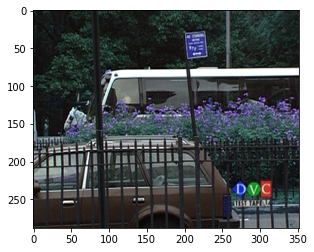

In [69]:
plt.imshow(images[2]) 

In [70]:
len(images)

85

#### Blur

In [71]:
img_smooth=images.copy()
for i in range(10,61):
  kernel = np.ones((9,9),np.float32)/25 #Create a smoothing/averaging mask
  img_smooth[i]= cv2.filter2D(images[i],-1,kernel) #Perform blurring

In [72]:
m,n, p= img_smooth[0].shape
print(m,n)

288 352


In [73]:

out = cv2.VideoWriter('/content/project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (n,m))
for i in range(len(img_smooth)):
    out.write(img_smooth[i])
out.release()

In [74]:
from moviepy.editor import *
clip=VideoFileClip('/content/project.avi')
clip.ipython_display()

100%|██████████| 86/86 [00:00<00:00, 438.79it/s]


#### Laplacian Edge Detection

In [75]:
mask = np.array([0,-1,0,-1,4,-1,0,-1,0]).reshape(3,3) # Vertical Mask
v_img = images.copy()

In [76]:
rows, cols,p = images[0].shape
print(rows,cols)

288 352


In [77]:


for i in range(20,70):
    for row in range(1, rows-1): #all rows
        for col in range(1, cols-1): #all columns
            v_img[i][row][col] = np.multiply(images[i][row-1:row+2, col-1:col+2], mask).sum()

In [78]:
out = cv2.VideoWriter('project.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15,(cols,rows))

for i in range(len(v_img)):
    out.write(v_img[i])

out.release()

In [79]:
clip = VideoFileClip('project.avi')
clip.ipython_display()

100%|██████████| 86/86 [00:00<00:00, 384.09it/s]


### Conclusion:

I implemented laplacian filter on a part of a video. I used the different masks, and found that [0,-1,0,-1,4,-1,0,-1,0] gave the best results. The negative mask detected many edges, which made deciphering the video very difficult. same was the case with the mask with 8 in the center of the mask. although blurring is not needed in this type of filtering, it was found that for this particular video, it helped with the subjective quatlity, so i applied that too. 